In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import inspect
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

import path_utils
path_utils.add_path_to_sys_path("../../src", mode="relative_to_cwd", frame=inspect.currentframe())
import nyuv2
import transforms

In [3]:
# You need to download the following NYUv2 dataset and metadata files [1,2,3,4]
# [1] https://raw.githubusercontent.com/ankurhanda/nyuv2-meta-data/master/classMapping40.mat
# [2] https://raw.githubusercontent.com/ankurhanda/nyuv2-meta-data/master/labels40.mat
# [3] https://raw.githubusercontent.com/ankurhanda/nyuv2-meta-data/master/splits.mat
# [4] http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat

data_dir = "/Users/mroberts/Downloads"
split = "train"

# # include all modalities in the NYUv2Dataset object
# modalities = "all"

# only load specified modalities in the NYUv2Dataset object
modalities = ["color", "depth", "semantic", "semantic_instance"]

# convert NYU894 labels into NYU40 labels to match Hypersim convention
# change semantic image to int16
# map 0 values to -1 in the semantic image to match Hypersim convention
# change semantic_instance image to int16
# map 255 values to -1 in the semantic_instance image to match the Hypersim convention
# transpose channels and convert to PyTorch tensor
transform = torchvision.transforms.Compose([
    transforms.SingleModalityTransform("semantic",          transforms.NYU894ToNYU40(data_dir)),
    transforms.SingleModalityTransform("semantic",          transforms.AsType(np.int16)),
    transforms.SingleModalityTransform("semantic",          transforms.MapValues({0:-1})),
    transforms.SingleModalityTransform("semantic_instance", transforms.AsType(np.int16)),
    transforms.SingleModalityTransform("semantic_instance", transforms.MapValues({255:-1})),
    transforms.AllModalitiesTransform(torchvision.transforms.ToTensor())
])

dataset = nyuv2.NYUv2Dataset(
    data_dir=data_dir,
    split=split,
    modalities=modalities,
    transform=transform)

dict_keys(['color', 'depth', 'semantic', 'semantic_instance'])
torch.Size([3, 480, 640]) torch.float32
torch.Size([1, 480, 640]) torch.float32
torch.Size([1, 480, 640]) torch.int16
torch.Size([1, 480, 640]) torch.int16


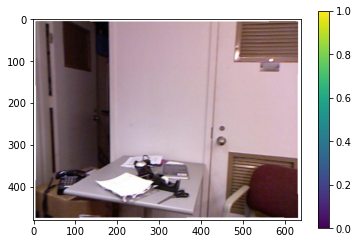

In [4]:
item = dataset[0]

print(item.keys())
print(item["color"].shape,             item["color"].dtype)
print(item["depth"].shape,             item["depth"].dtype)
print(item["semantic"].shape,          item["semantic"].dtype)
print(item["semantic_instance"].shape, item["semantic_instance"].dtype)

plt.imshow(np.array(item["color"]).transpose([1,2,0]).squeeze());
plt.colorbar();

In [5]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=False)

In [6]:
batch = next(iter(dataloader))
print(batch.keys())
print(batch["color"].shape,             batch["color"].dtype)
print(batch["depth"].shape,             batch["depth"].dtype)
print(batch["semantic"].shape,          batch["semantic"].dtype)
print(batch["semantic_instance"].shape, batch["semantic_instance"].dtype)

dict_keys(['color', 'depth', 'semantic', 'semantic_instance'])
torch.Size([2, 3, 480, 640]) torch.float32
torch.Size([2, 1, 480, 640]) torch.float32
torch.Size([2, 1, 480, 640]) torch.int16
torch.Size([2, 1, 480, 640]) torch.int16


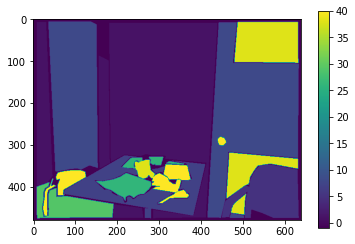

In [7]:
item_semantic = batch["semantic"][0]
plt.imshow(np.array(item_semantic).squeeze());
plt.colorbar();

img = np.array(item_semantic).squeeze()

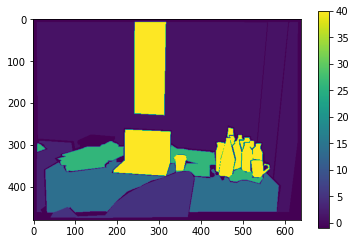

In [8]:
item_semantic = batch["semantic"][1]
plt.imshow(np.array(item_semantic).squeeze());
plt.colorbar();

torch.Size([2, 3, 480, 640])
(3, 480, 640)
0.0
1.0


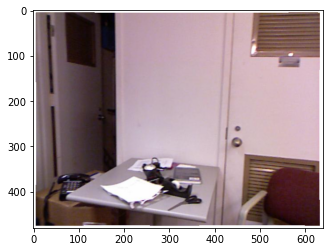

In [9]:
print(batch["color"].shape)

color = np.array(batch["color"][0])
print(color.shape)
print(np.min(color))
print(np.max(color))

plt.imshow(np.array(color).transpose([1,2,0]).squeeze());

torch.Size([2, 3, 480, 640])
(3, 480, 640)
0.0
1.0


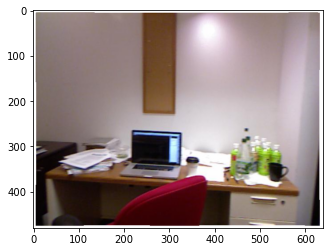

In [10]:
print(batch["color"].shape)

color = np.array(batch["color"][1])
print(color.shape)
print(np.min(color))
print(np.max(color))

plt.imshow(np.array(color).transpose([1,2,0]).squeeze());